# Data Science Bootcamp project

## Libraries

In [42]:
import numpy as np
import pandas as pd
import re
from bootcampviztools import*
from ToolBox import*
from Functions import*
from scipy.stats import chi2_contingency, mannwhitneyu, norm

## Exploratory Data Analysis -  Univariant

In [43]:
df_cardiovascular = pd.read_csv("Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset_cleaned.csv")

In [44]:
df = df_cardiovascular.copy()

We use the function card_type to classify each column if it's categorical (including binary) or numerical. 

In [45]:
card_type(df)

,Card,%_Card,Type,suggested_type
patientid,1000,100.0,int64,Continuous numeric
age,61,6.1,int64,Discrete numeric
gender,2,0.2,int64,Binary
chestpain,4,0.4,int64,Categorical
restingBP,95,9.5,int64,Discrete numeric
serumcholestrol,344,34.4,int64,Continuous numeric
fastingbloodsugar,2,0.2,int64,Binary
restingrelectro,3,0.3,int64,Categorical
maxheartrate,129,12.9,int64,Discrete numeric
exerciseangia,2,0.2,int64,Binary


Except the patientid, the rest of the features are classified in two different lists: categorical or numerical.

In [46]:
categorical = ["chestpain","restingrelectro", "slope","noofmajorvessels", "gender", "fastingbloodsugar", "exerciseangia", "target"]
numerical = ["age","restingBP","serumcholestrol","maxheartrate", "oldpeak"]

#### Categorical

First step to analyze the categorical features is doing their histograms in absolut and frequencial values. 

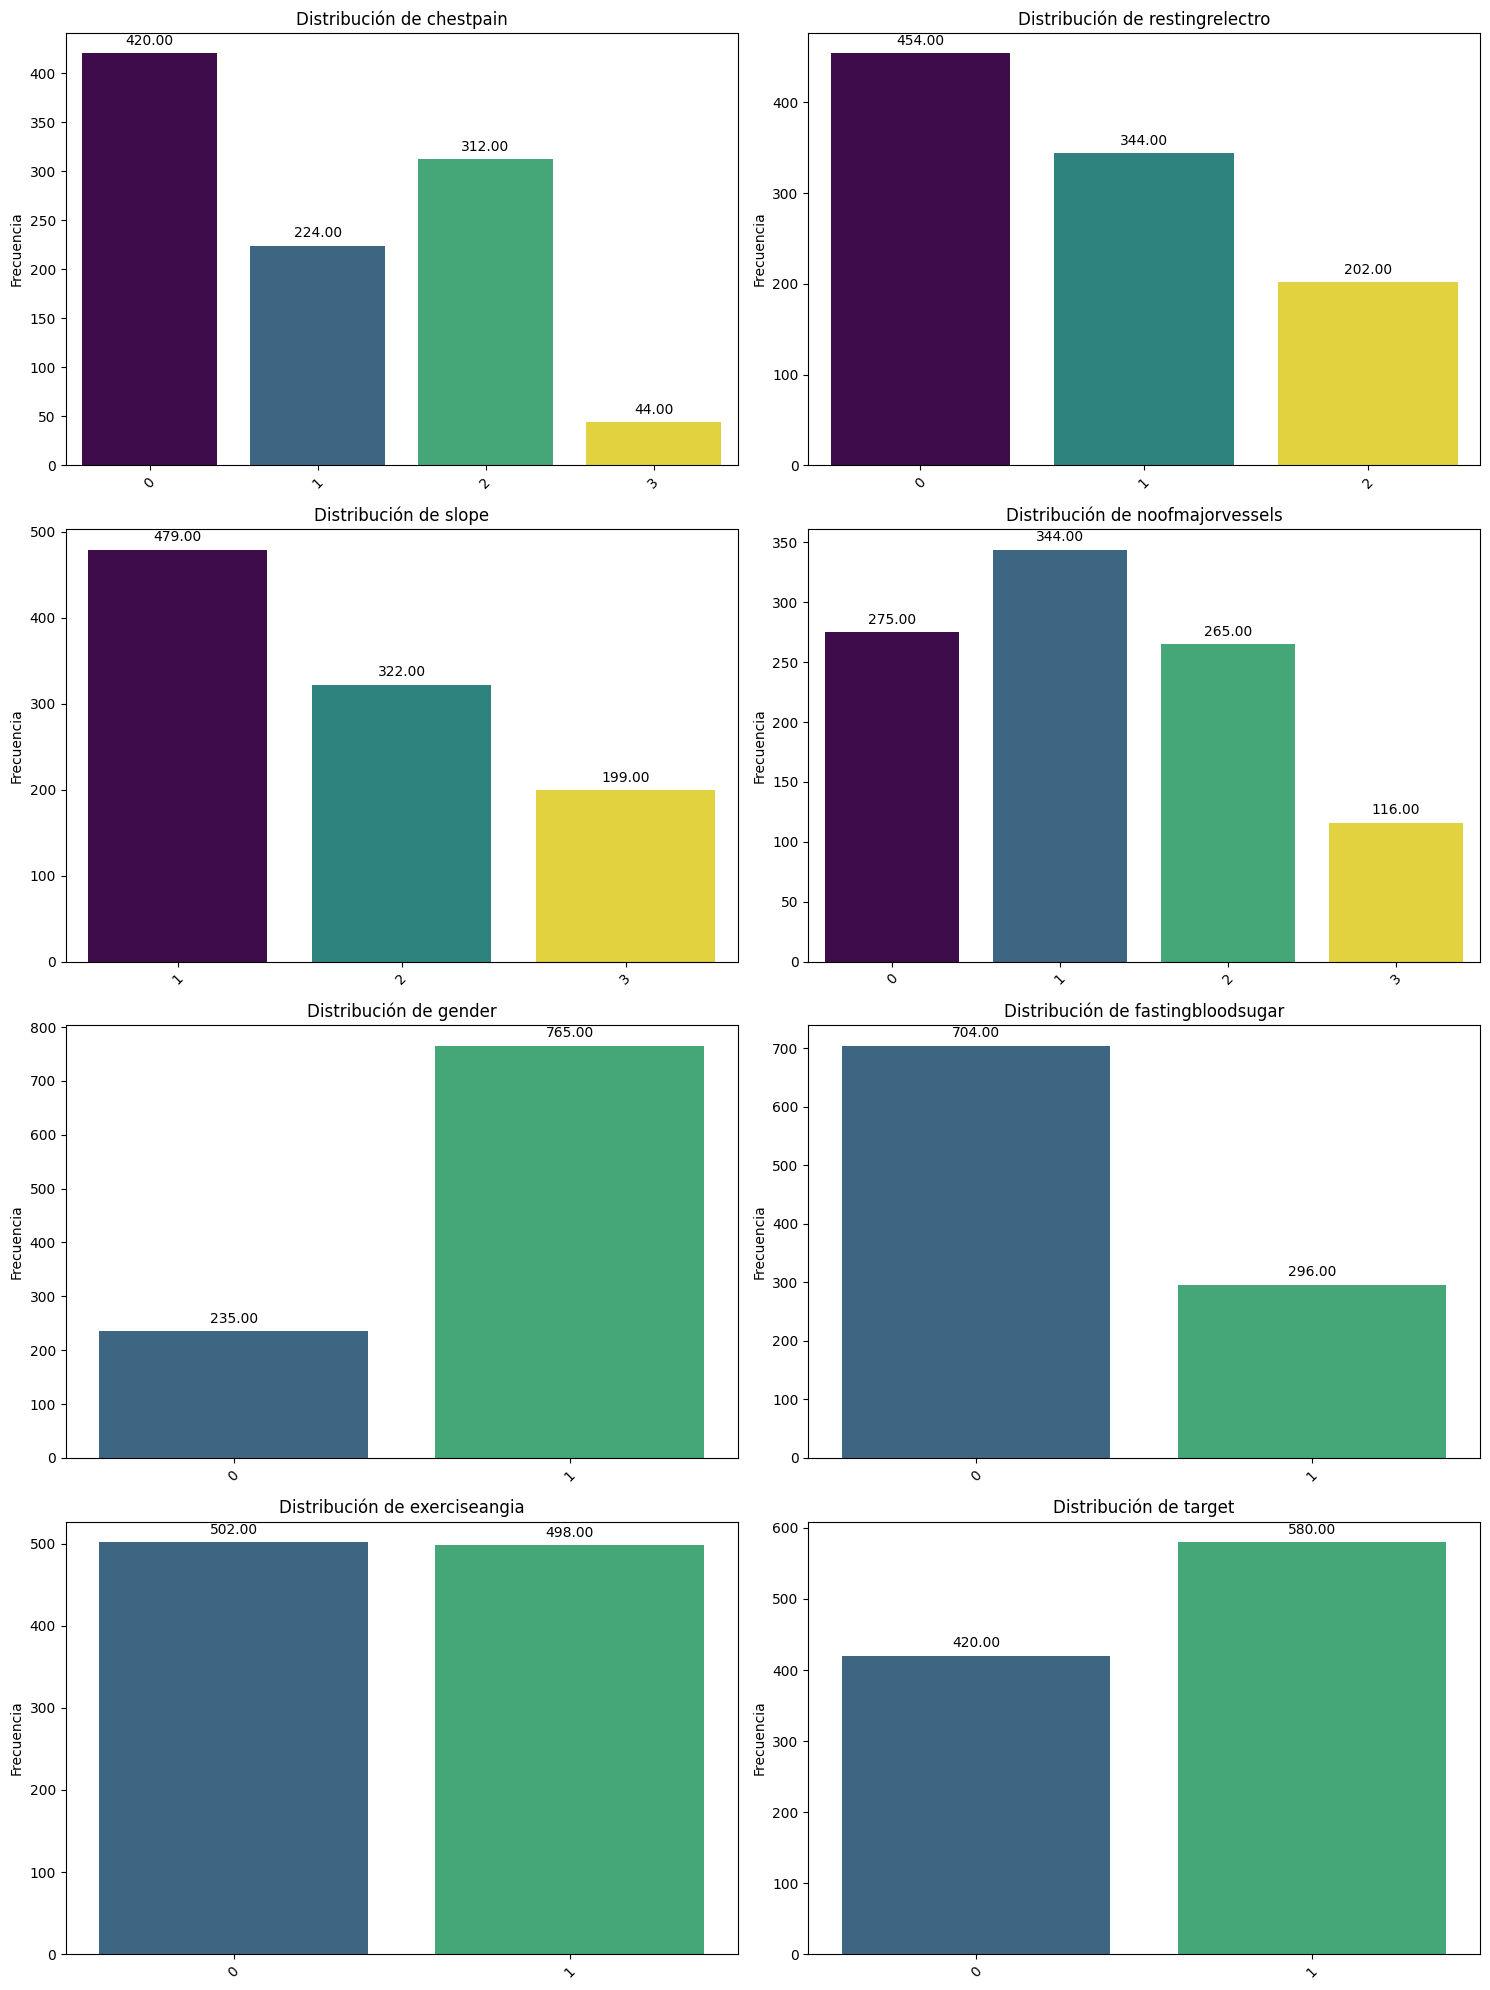

In [47]:
# Analyzing features in absolut values:

pinta_distribucion_categoricas(df, categorical, mostrar_valores= True)

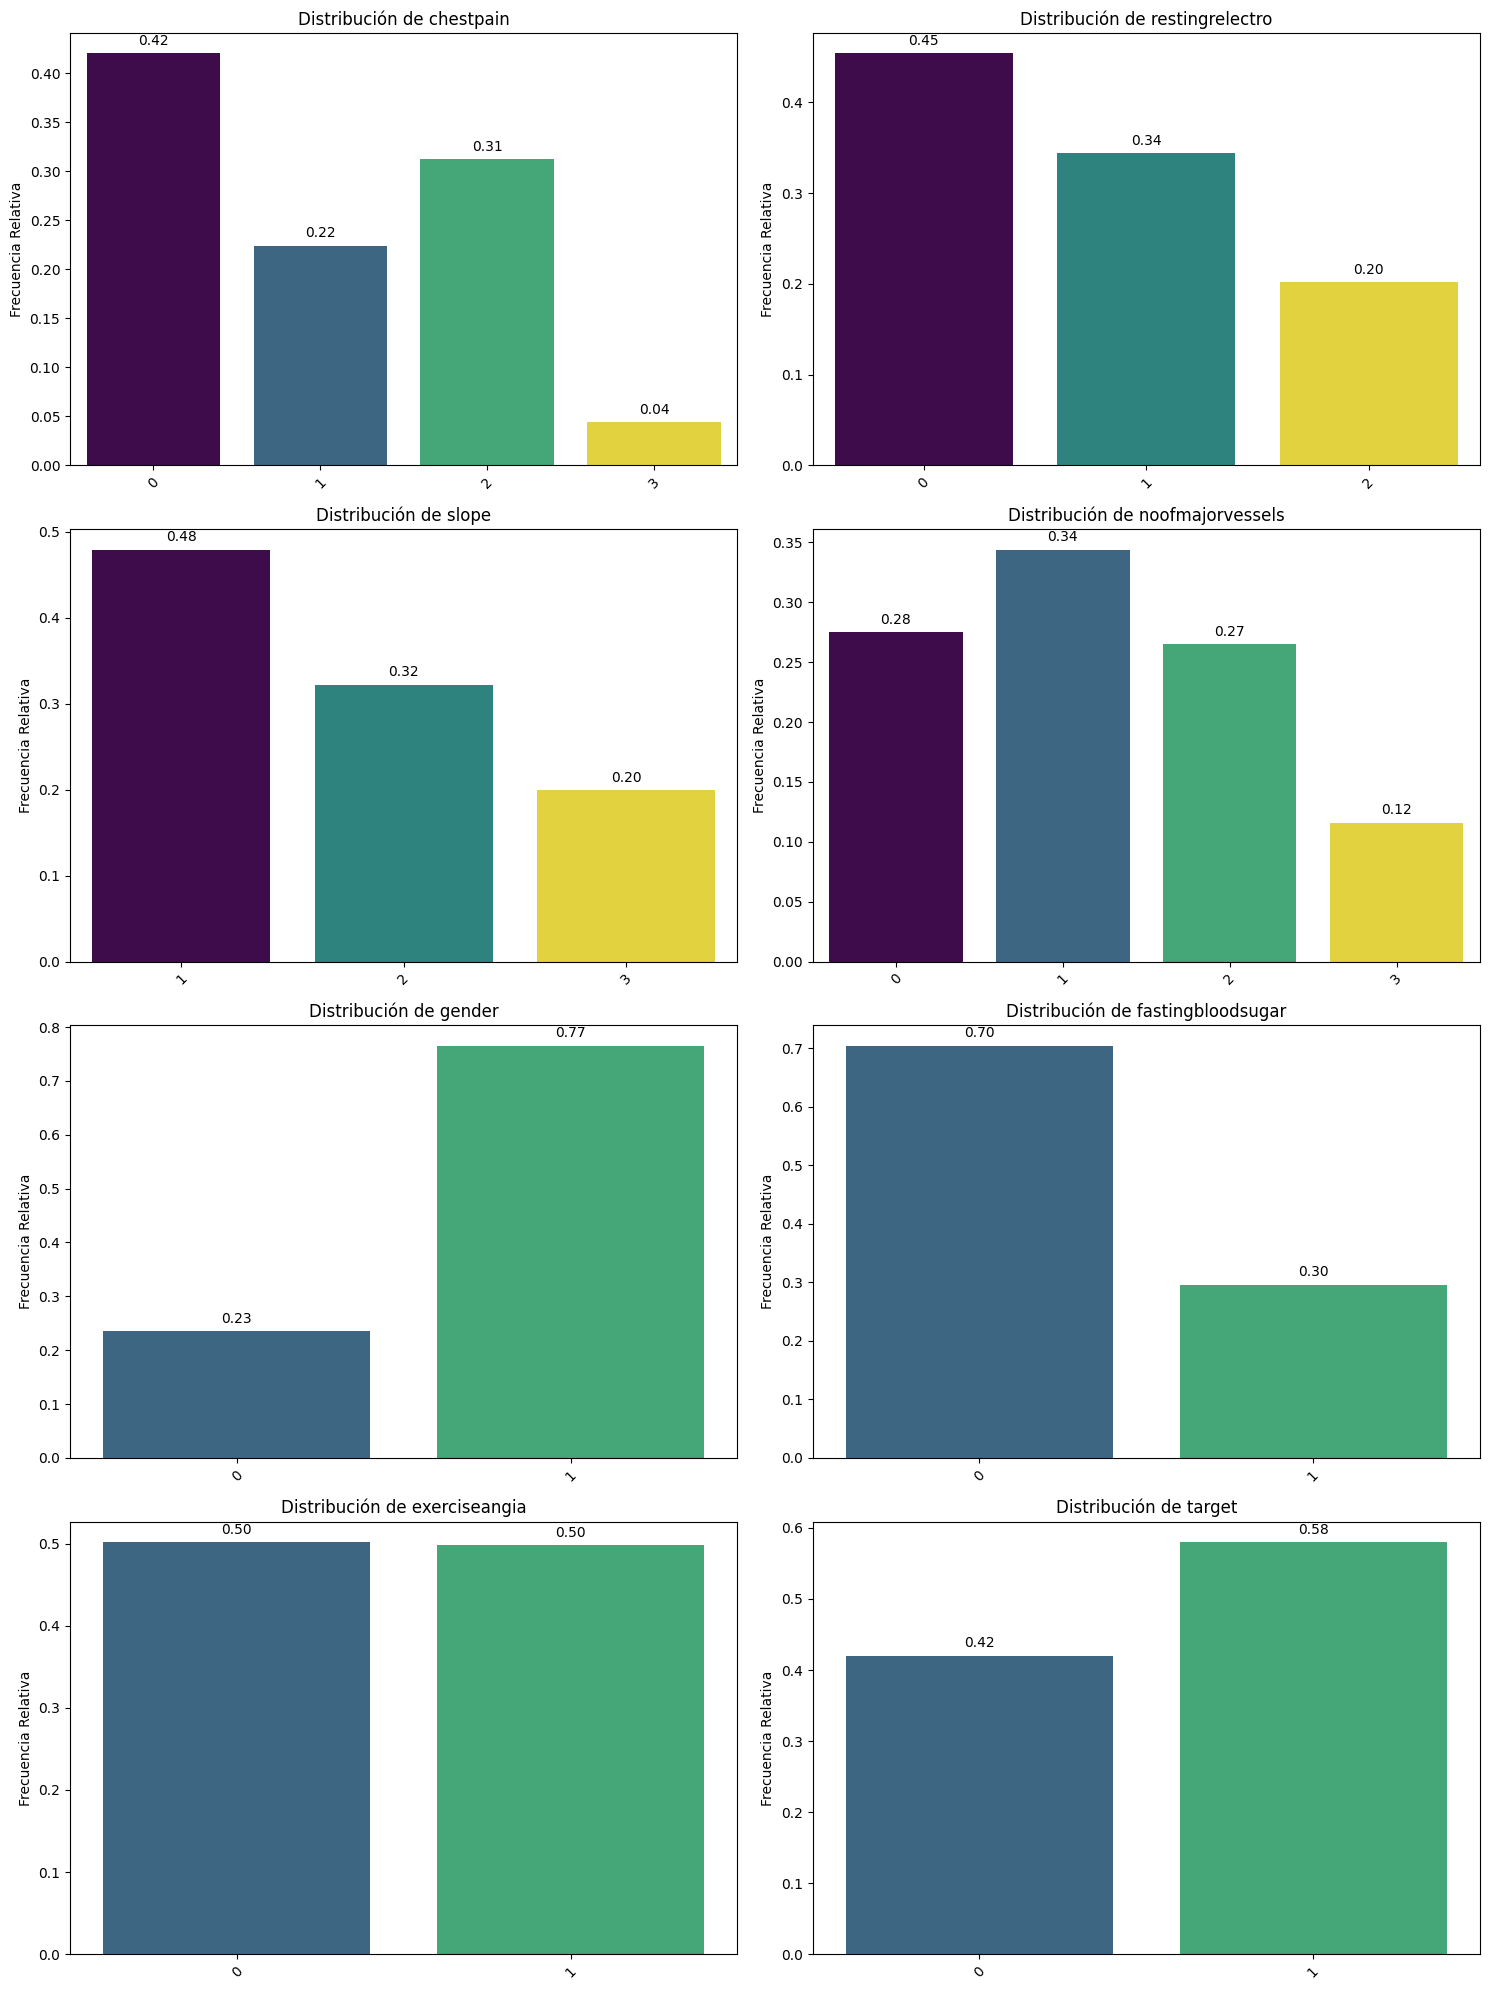

In [48]:
# Analyzing relative frequencies:

pinta_distribucion_categoricas(df, categorical,relativa= True, mostrar_valores= True)

- GENDER: Most patients are males (gender = 1), with a smaller proportion being females (gender = 0); specifically, there are 765 males (77% of the population) and 235 females (remaining 23%). It should be further analyzed how frequently males experience more heart problems compared to females. Given the unequal data distribution, this could impact project conclusions but requires thorough analysis. Understanding the context of the population under study is crucial.

- CHESTPAIN: The most common category of chest pain is type 0 (420 patients, representing 42% of the data), followed by type 3 (312 patients, 31% of the data). This suggests that most patients exhibit symptoms of typical angina when experiencing chest pain. The majority experiencing chest pain do so due to typical angina. There are very few asymptomatic cases. The remainder either experience chest pain due to atypical angina (22%) or another cause (31%). Posterior analysis should explore how this variable affects the target.

- FASTINGBLOODSUGAR: Most patients have fasting blood sugar levels below 120 mg/dl (fastingbloodsugar = 0), totaling 704 users (70% of the sample). A small fraction exhibits high fasting blood sugar levels (fastingbloodsugar = 1), comprising the remaining 30%.

- RESTINGELECTRO: A majority of patients have a normal resting electrocardiogram (restingrelectro = 0, 45% of the data, 454 patients). There is a significant proportion of patients with abnormal resting electrocardiogram results (restingrelectro = 1 or restingrelectro = 2). The distribution between normal and abnormal results is fairly equal. It would be beneficial to split this into two groups for further analysis.

- EXERCISEANGIA: There is a similar number of patients who do and do not experience exercise-induced angina.

- SLOPE: The most common slope of the ST segment during peak exercise is slope 1 (48% of the data), which represents a normal response, indicating a significant percentage of users have a positive response to the exercise test. Slope 2 accounts for 32% of the data, and it represents the ST segment remains horizontal during exercise. 

- NOOFMAJORVESSELS: Most patients have 1 major vessels colored by fluoroscopy (noofmajorvessels = 1), which represents the 34% of the patients attended.

#### Numerical

Starting with the measures of central tendency and position.

In [49]:
df[numerical].describe()

,age,restingBP,serumcholestrol,maxheartrate,oldpeak
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.24200,151.747000,311.447000,145.477000,2.707700
std,17.86473,29.965228,132.443801,34.190268,1.720753
min,20.00000,94.000000,0.000000,71.000000,0.000000
25%,34.00000,129.000000,235.750000,119.750000,1.300000
50%,49.00000,147.000000,318.000000,146.000000,2.400000
75%,64.25000,181.000000,404.250000,175.000000,4.100000
max,80.00000,200.000000,602.000000,202.000000,6.200000


The coefficient of variation (CV) is a measure of relative dispersion that indicates the degree of variability relative to the mean. 
It has been calculated the CV for the numerical features.
A high CV may indicate the need for further research to understand the causes of this variability, while a low CV may suggest that the variable is more homogeneous in the population studied.

In [50]:
for i in numerical:
    var_aux = get_CV(df,i)
    print(var_aux)

age    36.279457
dtype: float64
restingBP    19.746834
dtype: float64
serumcholestrol    42.52531
dtype: float64
maxheartrate    23.502181
dtype: float64
oldpeak    63.550365
dtype: float64


Variables with a lower CV, such as restingBP (19,75%) and maxheartrate (23,50%), are more consistent across individuals. The data of both features in the dataset is relatively dispersed around the mean, but not excessively.

Variables with a higher CV, such as serumcholestrol (42,52%) and oldpeak (63,55%), show greater diversity and may be influenced by multiple individual and external factors.

Variables with a moderate CV, such as age (36,28%), suggests that the data in the dataset is relatively dispersed around the mean, but not excessively.

We will do the analysis of frequencial and absolut of the numerical features with their histogram and boxplot.

(5, 2)


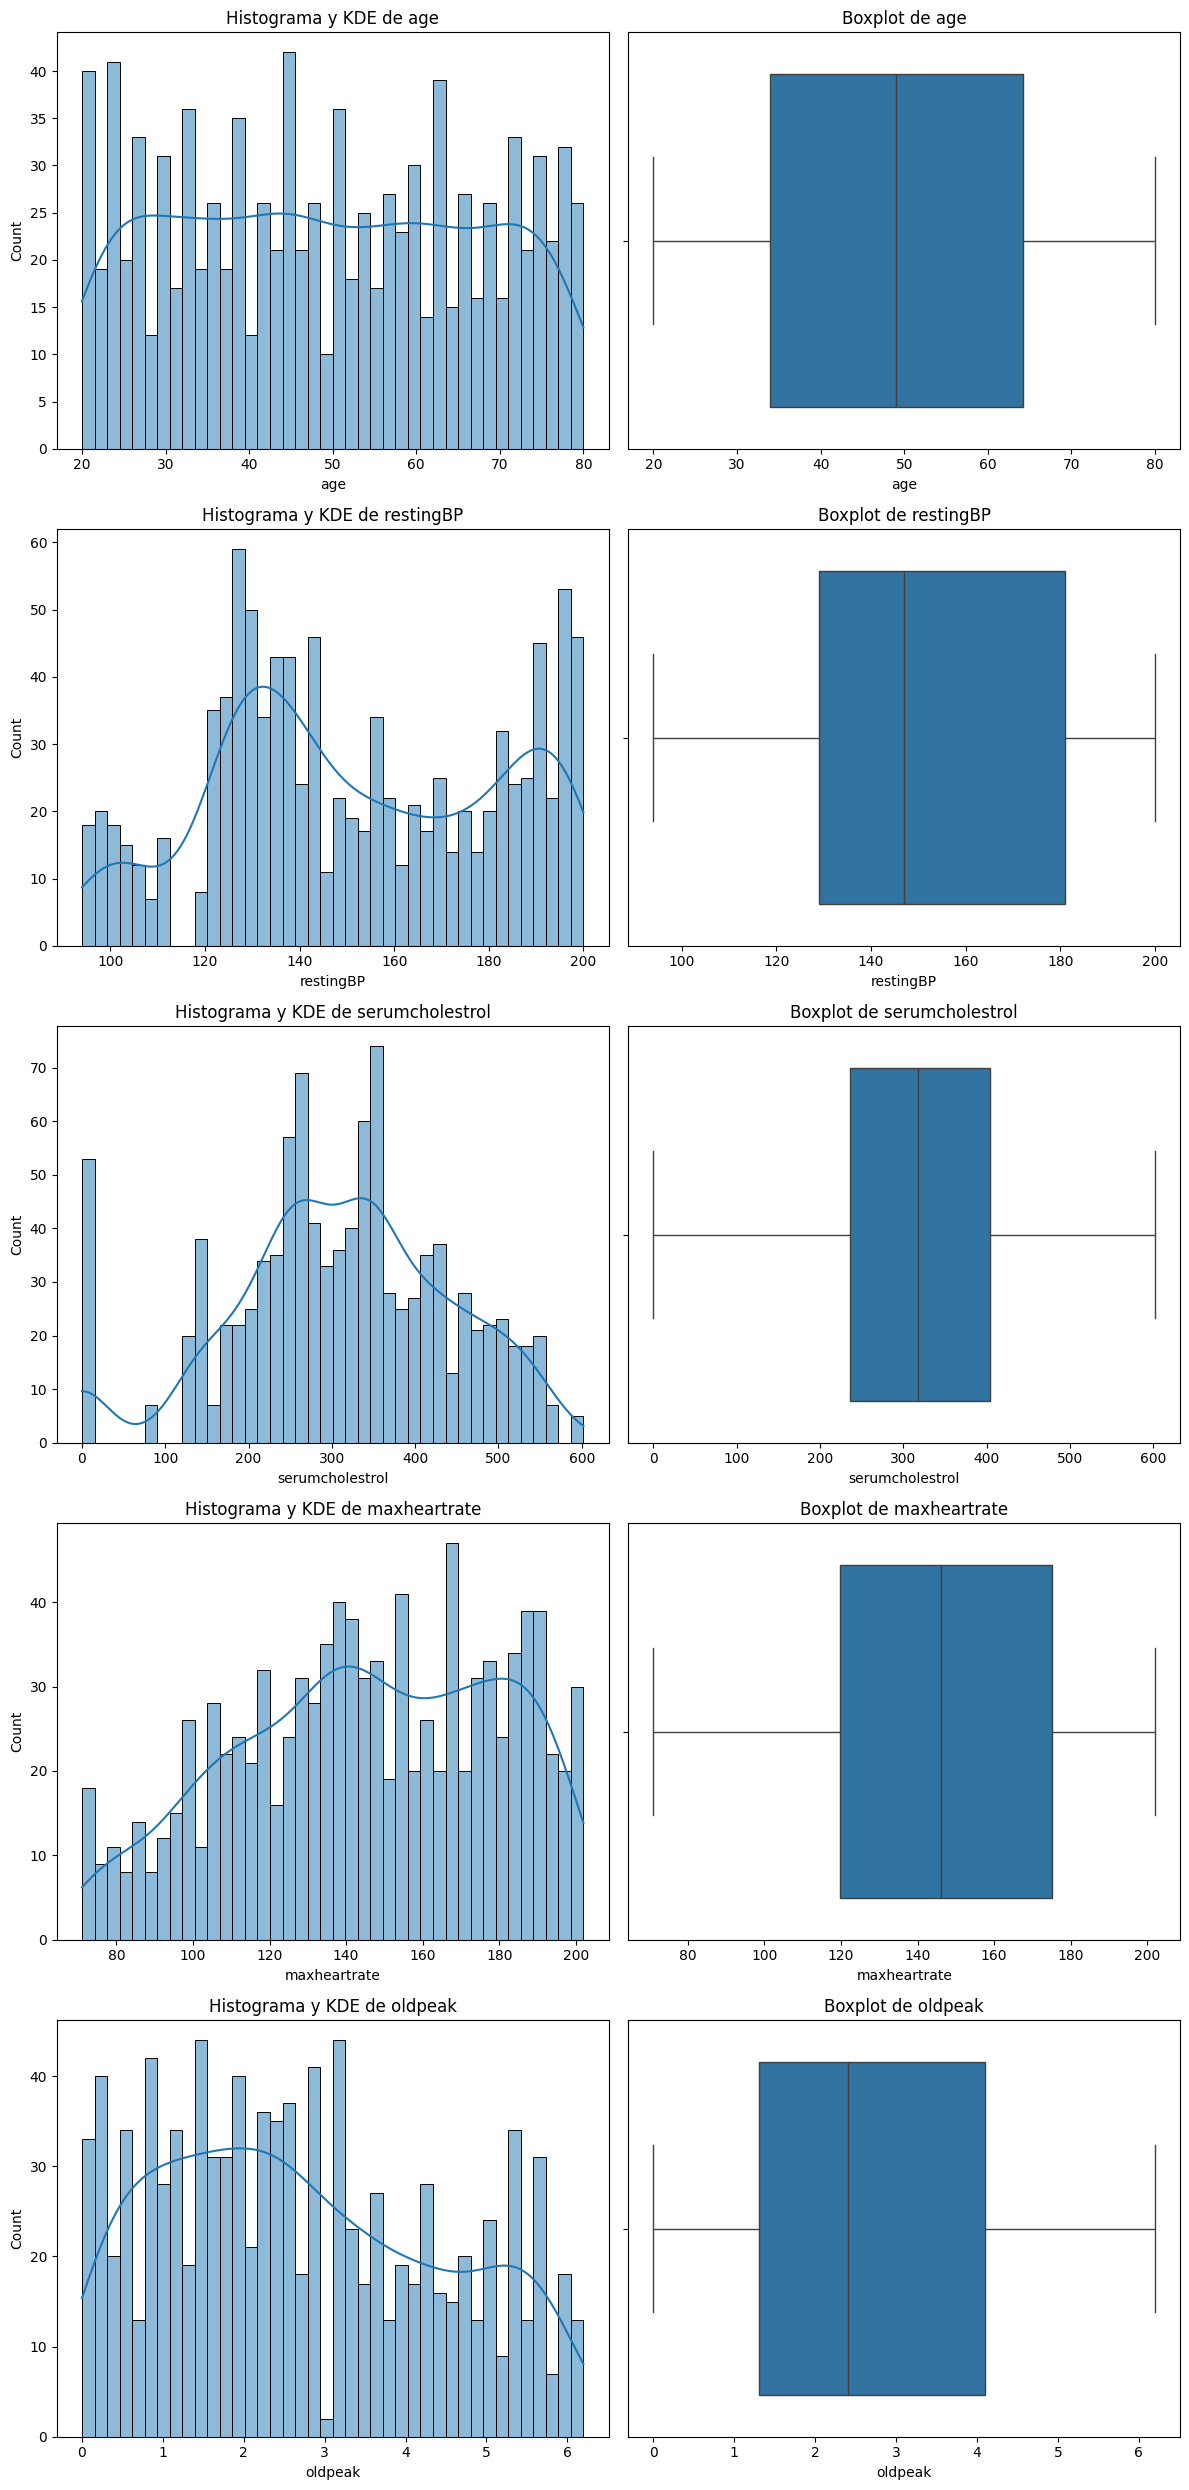

In [51]:
plot_combined_graphs(df, numerical, whisker_width=2, bins = 40)

- AGE: Most patients are between 35 and 65 years old, with an average age of 49 years. Although the histogram shows several peaks, there is an "effect plateau." The variable has a moderate dispersion (CV = 36.28%) and no outliers. 

- RESTINGBP: The histogram of restingBP shows a bimodal distribution with several peaks, suggesting the existence of multiple subgroups. The mean is 151.74 mm Hg, and there are no outliers. This variable has a coefficient of variation (CV) of 19.75%, indicating relatively high consistency among individuals. For further analysis, stratified analyses would be helpful to better understand specific characteristics and needs.


- SERUMCHOLESTEROL: The histogram of serumcholesterol shows an almost normal distribution, with two significant peaks between 250 and 350 mg/dl, where most data is concentrated. Although there are no outliers, values below 100 mg/dl are distant from the rest. The 25th and 75th percentiles of the data are between 235.75 and 404.25 mg/dl. This variable has a CV of 42.52%, indicating greater diversity and possible influence from individual and external factors.


- MAXHEARTRATE: The histogram of maxheartrate shows a slightly left-skewed distribution, with a higher concentration of values at the upper end. It has no outliers and a CV of 23.50%, suggesting moderate dispersion around the mean. In a clinical context, lower maximum heart rates may have important health implications, warranting more detailed exploration.


- OLDPEAK: The histogram of oldpeak shows a right-skewed distribution, with most values between 0 and 3. Seventy percent of the values are between 0 and 4. There are no outliers. With a CV of 63.55%, this variable shows considerable diversity and may be influenced by multiple individual and external factors.

### EXTRA ANALYSIS: PROBABILITY STUDY

1. Who has more probabilities to have a heart disease, women or man?
2. Which is the probability that a person with a high serum cholesterol level greater than 200 has a heart disease?
3. Which is the probability than a man with more than 50 years has a heart disease if he has chest pain type 2 (atypical angina)? And women?
4. What is the probability that a person with a fasting blood sugar level greater than 120 and an abnormal resting electrocardiogram has heart disease?
5. What is the probability that a person with chest pain type 2 or 3 has very high serum cholesterol?

In [52]:
# Probability of having heart disease based on conditions
def probability_condition(df, condition):
    count_condition = df[condition].shape[0]
    if count_condition == 0:
        return 0
    return df[condition & (df['target'] == 1)].shape[0] / count_condition

# 1. Who has more probabilities to have a heart disease, women or men?
prob_women = probability_condition(df, df['gender'] == 0)
prob_men = probability_condition(df, df['gender'] == 1)

# 2. What is the probability that a person with a high serum cholesterol level greater than 200 has a heart disease?
prob_high_cholesterol = probability_condition(df, df['serumcholestrol'] > 200)

# 3. What is the probability that a man over 50 years old has a heart disease if he has chest pain type 2 (atypical angina)? And women?
prob_men_50_angina = probability_condition(df, (df['gender'] == 1) & (df['age'] > 50) & (df['chestpain'] == 2))
prob_women_50_angina = probability_condition(df, (df['gender'] == 0) & (df['age'] > 50) & (df['chestpain'] == 2))

# 4. What is the probability that a person with a fasting blood sugar level greater than 120 and an abnormal resting electrocardiogram has heart disease?
prob_sugar_ecg = probability_condition(df, (df['fastingbloodsugar'] > 120) & (df['restingrelectro'] != 0))

# 5. What is the probability that a person with chest pain type 2 or 3 has very high serum cholesterol?
prob_chestpain_high_cholesterol = probability_condition(df, (df['chestpain'].isin([2, 3])) & (df['serumcholestrol'] > 200))

# Display results
results = {
    "prob_women": prob_women,
    "prob_men": prob_men,
    "prob_high_cholesterol": prob_high_cholesterol,
    "prob_men_50_angina": prob_men_50_angina,
    "prob_women_50_angina": prob_women_50_angina,
    "prob_sugar_ecg": prob_sugar_ecg,
    "prob_chestpain_high_cholesterol": prob_chestpain_high_cholesterol
}

results

{'prob_women': 0.5659574468085107,
 'prob_men': 0.5843137254901961,
 'prob_high_cholesterol': 0.5863746958637469,
 'prob_men_50_angina': 0.8978102189781022,
 'prob_women_50_angina': 0.7777777777777778,
 'prob_sugar_ecg': 0,
 'prob_chestpain_high_cholesterol': 0.8957654723127035}

Probability that a man has a heart disease: 58,43%

Probability that a woman has a heart disease: 56,59%

Probability that a person with high serum cholesterol (>200) has heart disease: 58,64%

Probability that a man over 50 years old with chest pain type 2 has heart disease: 89,78%

Probability that a woman over 50 years old with chest pain type 2 has heart disease: 77,77%

Probability that a person with fasting blood sugar > 120 and abnormal resting electrocardiogram has heart disease: 0%

Probability that a person with chest pain type 2 or 3 has very high serum cholesterol: 89,57%